In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import geopandas
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from shapely import geometry
from datetime import datetime

https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916

In [161]:
hs_df = geopandas.GeoDataFrame()

for day in range(1, 32):
    date_object = datetime(2019, 7, day)
    file = './output/LATE_2km_SG10_hotspot_grid_' + date_object.strftime("%Y%m%d") + '.geojson'
    temp = geopandas.read_file(file)
    temp['sat_date'] = date_object.strftime("%d/%m/%Y")
    hs_df = hs_df.append(temp)

In [162]:
hs_df.crs = {'init': 'epsg:3857'}
hs_df['id_grid'] = hs_df.index

In [163]:
clip_area = geopandas.read_file('./verification/July_updated.shp')
clip_area = clip_area.to_crs({'init': 'epsg:3857'})

In [164]:
truth_df = pd.read_csv('./verification/july_ground_truth_2019.csv')

In [165]:
truth_df.drop(columns=["Unnamed: 0"], inplace=True)

In [166]:
truth_gdf = geopandas.GeoDataFrame(truth_df, geometry=geopandas.points_from_xy(truth_df.lon, truth_df.lat))

In [167]:
truth_gdf.crs = {'init' :'epsg:4326'}
truth_gdf = truth_gdf.to_crs({'init': 'epsg:3857'})

In [168]:
truth_gdf_b500 = truth_gdf.buffer(1500)

In [169]:
truth_gdf.geometry = truth_gdf_b500

In [170]:
hs_df_clipped = geopandas.overlay(clip_area, hs_df, how='intersection')

In [171]:
hs_df_clipped.drop(columns=['id'], inplace=True)
hs_df_clipped.head()

,weight,geo_weight,polar_weight,adj_weight,sat_date,id_grid,geometry
0,0.066250,0.000000,0.06625,0.257391,11/07/2019,5773,"POLYGON ((11335976.873 -13195.474, 11337976.87..."
1,0.474902,0.254902,0.22000,0.689131,26/07/2019,2921,"POLYGON ((11335976.873 -13195.474, 11337976.87..."
2,0.039216,0.039216,0.00000,0.198030,31/07/2019,3977,"POLYGON ((11335976.873 -13195.474, 11337976.87..."
3,0.178431,0.078431,0.10000,0.422411,29/07/2019,2613,"POLYGON ((11320593.302 -15195.474, 11320603.45..."
4,0.623358,0.019608,0.60375,0.789530,14/07/2019,2238,"POLYGON ((11320593.302 -15195.474, 11320603.45..."


In [172]:
truth_gdf['id_truth'] = truth_gdf.index
truth_gdf.head()

,datestamp,lat,lon,period,geometry,end_date,start_date,id_truth
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,"POLYGON ((11322326.418 -14118.750, 11322319.19...",20/7/2019 0:00,20/7/2019 0:00,0
1,20/7/2019,-0.137187,101.699419,0 days 00:00:00.000000000,"POLYGON ((11322627.537 -15271.632, 11322620.31...",20/7/2019 0:00,20/7/2019 0:00,1
2,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,"POLYGON ((11323694.379 -13912.263, 11323687.15...",20/7/2019 0:00,20/7/2019 0:00,2
3,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,"POLYGON ((11323599.746 -14239.200, 11323592.52...",25/7/2019 0:00,25/7/2019 0:00,3
4,25/7/2019,-0.132241,101.698337,0 days 00:00:00.000000000,"POLYGON ((11322507.089 -14721.002, 11322499.86...",25/7/2019 0:00,25/7/2019 0:00,4


In [173]:
overlaid_gdf_ungrp = geopandas.overlay(truth_gdf, hs_df_clipped, how='union')

In [174]:
overlaid_gdf_ungrp.head()

,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,adj_weight,sat_date,id_grid,geometry
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.109804,0.009804,0.1,0.331367,14/07/2019,2235.0,"POLYGON ((11320606.290 -12636.816, 11320679.39..."
1,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,2.0,0.109804,0.009804,0.1,0.331367,14/07/2019,2235.0,"POLYGON ((11320877.307 -13195.474, 11320947.17..."
2,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,3.0,0.109804,0.009804,0.1,0.331367,14/07/2019,2235.0,"POLYGON ((11321023.737 -13195.474, 11321039.08..."
3,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.186275,0.186275,0.0,0.431595,12/07/2019,4234.0,"POLYGON ((11320606.290 -12636.816, 11320679.39..."
4,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,2.0,0.186275,0.186275,0.0,0.431595,12/07/2019,4234.0,"POLYGON ((11320877.307 -13195.474, 11320947.17..."


In [175]:
overlaid_gdf = overlaid_gdf_ungrp.sort_values(by=['adj_weight']).groupby(['id_grid', 'sat_date']).last()

In [176]:
#overlaid_gdf_ungrp.shape
overlaid_gdf_ungrp.loc[overlaid_gdf_ungrp['sat_date'] == '25/07/2019']
overlaid_gdf

,,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,adj_weight,geometry
id_grid,sat_date,,,,,,,,,,,,
1271.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11383976.873 48804.526, 11385976.873..."
1272.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11385976.873 48804.526, 11387976.873..."
1273.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,0.000000,0.06000,0.244949,"POLYGON ((11461976.873 48804.526, 11463976.873..."
1274.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,0.000000,0.06000,0.244949,"POLYGON ((11463976.873 48804.526, 11465976.873..."
1278.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11383976.873 46804.526, 11385976.873..."
1279.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11385976.873 46804.526, 11387976.873..."
1282.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051250,0.000000,0.05125,0.226385,"POLYGON ((11385976.873 44804.526, 11387976.873..."
1307.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071250,0.000000,0.07125,0.266927,"POLYGON ((12195976.873 30049.973, 12197976.873..."
1323.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066250,0.000000,0.06625,0.257391,"POLYGON ((11379976.873 26804.526, 11381976.873..."


In [177]:
overlaid_gdf.loc[overlaid_gdf['adj_weight'].isna(), 'adj_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['polar_weight'].isna(), 'polar_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['geo_weight'].isna(), 'geo_weight'] = 0

In [178]:
overlaid_gdf = overlaid_gdf.reset_index()
overlaid_gdf = geopandas.GeoDataFrame(overlaid_gdf)

In [179]:
overlaid_gdf.loc[overlaid_gdf['lat'].isna(), 'truth_flag'] = 0
overlaid_gdf['start_date'].unique()

array([nan, '16/7/2019 0:00', '1/7/2019 0:00', '31/7/2019 0:00',
       '25/7/2019 0:00', '20/7/2019 0:00', '28/7/2019 0:00',
       '30/7/2019 0:00', '5/7/2019 0:00', '10/7/2019 0:00'], dtype=object)

In [180]:
for index, row in overlaid_gdf.iterrows():
    if pd.isna(row['start_date']):
        pass
    else:
        sat_date =  datetime.strptime(row['sat_date'], "%d/%m/%Y")
        truth_start_date = datetime.strptime(row['start_date'], "%d/%m/%Y %H:%M")
        truth_end_date = datetime.strptime(row['end_date'], "%d/%m/%Y %H:%M")
        if (sat_date >= truth_start_date) and (sat_date <= truth_end_date):
            overlaid_gdf.loc[index, 'truth_flag'] = 1
        else:
            overlaid_gdf.loc[index, 'truth_flag'] = 0 #np.nan

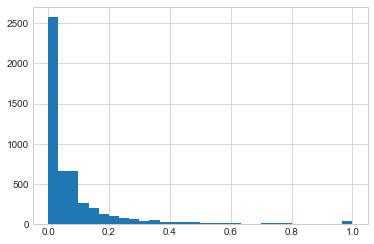

In [393]:
overlaid_gdf['weight'].hist(bins=30)

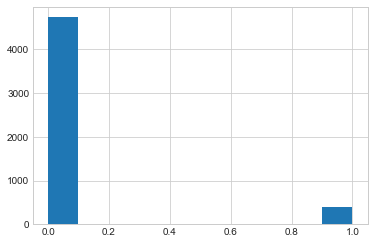

In [182]:
overlaid_gdf['truth_flag'].hist()
#overlaid_gdf.to_file('test.geojson', driver='GeoJSON')

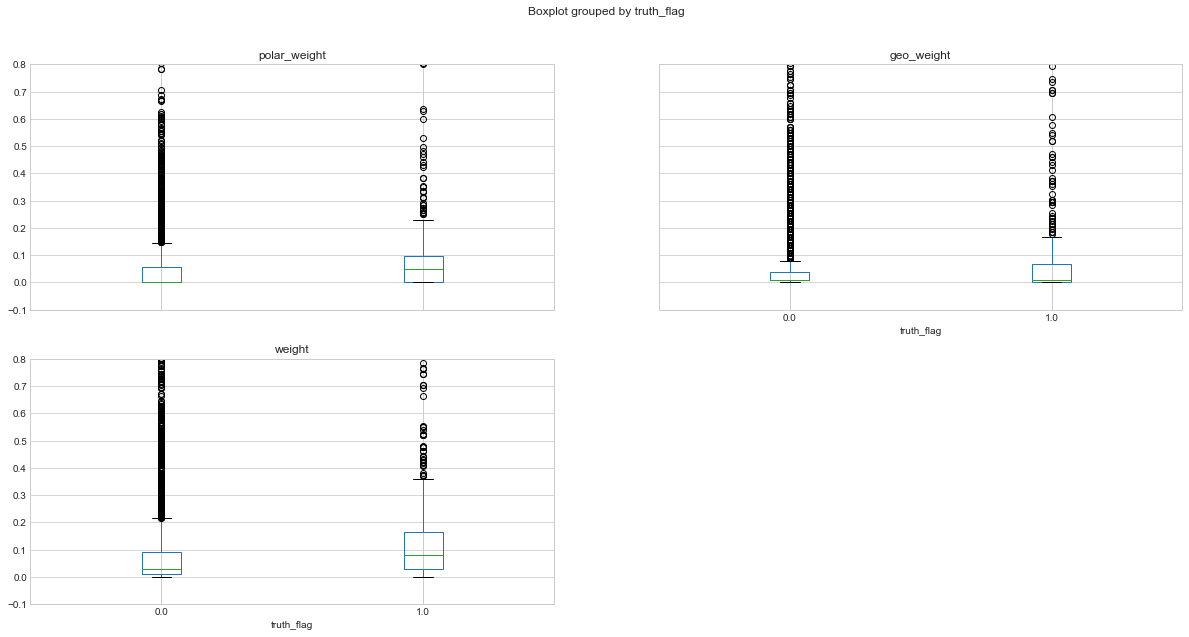

In [306]:
axes = overlaid_gdf.boxplot(column=['polar_weight', 'geo_weight', 'weight'], by='truth_flag', return_type='axes', figsize=(20, 10))
for ax in axes:
    ax.set_ylim(-0.1, 0.8)

In [183]:
final_gdf = overlaid_gdf.dropna(axis=0, subset=['truth_flag'])

In [184]:
final_gdf

,id_grid,sat_date,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,adj_weight,geometry,truth_flag
0,1271.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11383976.873 48804.526, 11385976.873...",0.0
1,1272.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11385976.873 48804.526, 11387976.873...",0.0
2,1273.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,0.000000,0.06000,0.244949,"POLYGON ((11461976.873 48804.526, 11463976.873...",0.0
3,1274.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,0.000000,0.06000,0.244949,"POLYGON ((11463976.873 48804.526, 11465976.873...",0.0
4,1278.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11383976.873 46804.526, 11385976.873...",0.0
5,1279.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,0.000000,0.03125,0.176777,"POLYGON ((11385976.873 46804.526, 11387976.873...",0.0
6,1282.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051250,0.000000,0.05125,0.226385,"POLYGON ((11385976.873 44804.526, 11387976.873...",0.0
7,1307.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071250,0.000000,0.07125,0.266927,"POLYGON ((12195976.873 30049.973, 12197976.873...",0.0
8,1323.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066250,0.000000,0.06625,0.257391,"POLYGON ((11379976.873 26804.526, 11381976.873...",0.0
9,1324.0,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066250,0.000000,0.06625,0.257391,"POLYGON ((11381976.873 26804.526, 11383976.873...",0.0


In [185]:
from sklearn import metrics
y = final_gdf['truth_flag'].values.astype(int)
scores = final_gdf['adj_weight'].values.astype(float)
scores_geo = final_gdf['geo_weight'].values.astype(float)
scores_polar = final_gdf['polar_weight'].values.astype(float)
#alpha = 0.5
#gamma = 2
#scores = (scores_geo * (1 - alpha) + scores_polar * alpha) ** (1/gamma)
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

In [186]:
print (fpr, tpr, thresholds)

[0.         0.00676247 0.00972105 0.00972105 0.00993238 0.00993238
 0.01310228 0.01352494 0.01373626 0.01373626 0.01458157 0.01458157
 0.0147929  0.0147929  0.01500423 0.01500423 0.01542688 0.01669484
 0.0171175  0.01775148 0.01775148 0.01817413 0.01817413 0.01923077
 0.01923077 0.02430262 0.02472527 0.0272612  0.0272612  0.02789518
 0.02789518 0.02895182 0.02916314 0.03064243 0.03064243 0.03106509
 0.03529163 0.03529163 0.03571429 0.03592561 0.03592561 0.03613694
 0.03613694 0.03634827 0.03634827 0.03867287 0.03867287 0.0397295
 0.04036348 0.04099746 0.04099746 0.04120879 0.04142012 0.04268808
 0.04268808 0.04332206 0.04332206 0.04374472 0.04374472 0.04416737
 0.04416737 0.04459003 0.04543533 0.04543533 0.04585799 0.04585799
 0.04628064 0.04712595 0.04754861 0.04818259 0.04860524 0.0498732
 0.05092984 0.05092984 0.05156382 0.05240913 0.05304311 0.05304311
 0.05325444 0.05367709 0.05388842 0.05388842 0.05431107 0.05515638
 0.05621302 0.05663567 0.05705833 0.05769231 0.06001691 0.060016

In [187]:
metrics.roc_auc_score(y, scores)

0.6493168850380389

In [188]:
csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
csi.argmax()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


405

In [189]:
csi[csi.argmax()], tpr[csi.argmax()], fpr[csi.argmax()]

(0.46466361346434243, 0.6675, 0.39539306846999156)

In [190]:
thresholds[csi.argmax()]

0.23717082451262844

In [191]:
csi.max()

0.46466361346434243

In [192]:
csi.shape, fpr.shape, tpr.shape

((446,), (446,), (446,))

Text(0.5, 1.0, 'Verification scores for MultiSat (H-8/MODIS/VIIRS)(Jul 2019)')

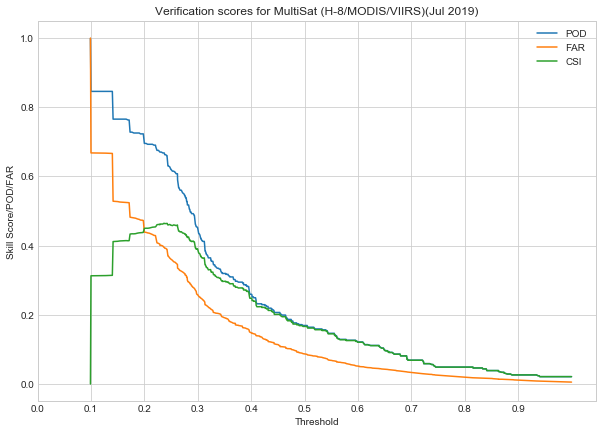

In [193]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

ax.plot(thresholds[1:-1], tpr[1:-1], label='POD');
ax.plot(thresholds[1:-1], fpr[1:-1], label='FAR');
ax.plot(thresholds[1:-1], csi[1:-1], label='CSI');
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Skill Score/POD/FAR')
plt.xticks(np.arange(0, 1, step=0.1))
plt.title('Verification scores for MultiSat (H-8/MODIS/VIIRS)(Jul 2019)')

In [194]:
import numpy as np
alpha_list = np.linspace(0, 1.0, 50)
scores_alpha_list = []
y = final_gdf['truth_flag'].values.astype(int)
fpr_alpha_list = []
tpr_alpha_list = []
thresholds_alpha_list = []
for alpha in alpha_list:
    score_alpha = ((1 - alpha) * final_gdf['geo_weight'].values.astype(float)) + (alpha * final_gdf['polar_weight'].values.astype(float))
    score_alpha = (score_alpha) ** (1/2)
    roc_alpha = metrics.roc_auc_score(y, score_alpha)
    scores_alpha_list.append(roc_alpha)
    fpr_alpha, tpr_alpha, thresholds_alpha = metrics.roc_curve(y, score_alpha, pos_label=1)
    fpr_alpha_list.append(fpr_alpha)
    tpr_alpha_list.append(tpr_alpha)
    thresholds_alpha_list.append(thresholds_alpha)

0.8163265306122448 0.657812235841082


Text(0, 0.5, 'ROC score (1.0 is perfect)')

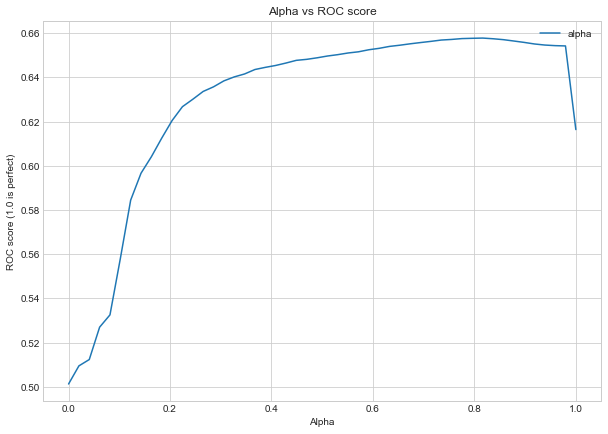

In [195]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

print (alpha_list[np.argmax(scores_alpha_list)], np.max(scores_alpha_list))

ax.plot(alpha_list, scores_alpha_list, label='alpha');
ax.legend()
plt.title('Alpha vs ROC score')
ax.set_xlabel('Alpha')
ax.set_ylabel('ROC score (1.0 is perfect)')

In [224]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = final_gdf[final_gdf.truth_flag==0]
df_minority = final_gdf[final_gdf.truth_flag==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
y_downsampled = df_downsampled['truth_flag'].values.astype(int)
scores_downsampled = df_downsampled['adj_weight'].values.astype(float)
scores_geo_downsampled = df_downsampled['geo_weight'].values.astype(float)
scores_polar_downsampled = df_downsampled['polar_weight'].values.astype(float)
fpr_downsampled, tpr_downsampled, thresholds_downsampled = metrics.roc_curve(y_downsampled, scores_downsampled, pos_label=1)

In [226]:
metrics.roc_auc_score(y_downsampled, scores_downsampled)
csi_downsampled = 1/((1/(1-fpr_downsampled)) + (1/tpr_downsampled) - 1)
csi_downsampled.max()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


0.481217731885348

Text(0.5, 1.0, 'Verification scores for MultiSat (H-8/MODIS/VIIRS)(Downsampled)')

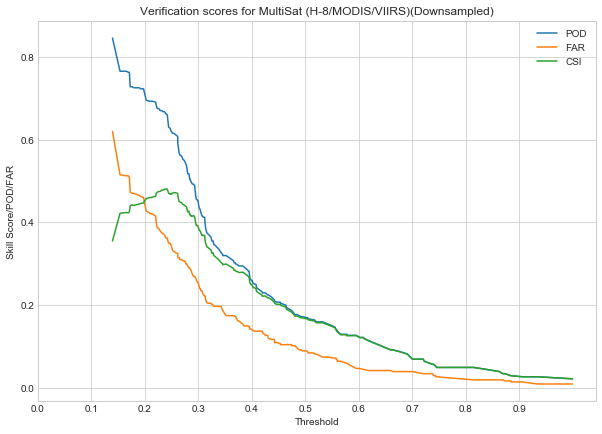

In [227]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

ax.plot(thresholds_downsampled[1:-2], tpr_downsampled[1:-2], label='POD');
ax.plot(thresholds_downsampled[1:-2], fpr_downsampled[1:-2], label='FAR');
ax.plot(thresholds_downsampled[1:-2], csi_downsampled[1:-2], label='CSI');
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Skill Score/POD/FAR')
plt.xticks(np.arange(0, 1, step=0.1))
plt.title('Verification scores for MultiSat (H-8/MODIS/VIIRS)(Downsampled)')

In [228]:
pdf = pd.DataFrame(df_downsampled)

In [229]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(fit_intercept=True, penalty='none', solver='newton-cg')


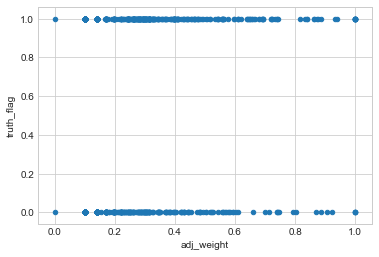

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
alpha = 0.5
pdf['adj_weight'] = pdf['weight'] ** (1/2)
pdf.plot.scatter(x='adj_weight', y='truth_flag')
x = pdf[['adj_weight']].values.reshape(-1,1)
y = pdf['truth_flag'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [371]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [372]:
y_pred = logisticRegr.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(x, y)))

Accuracy of logistic regression classifier on test set: 0.62


In [373]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[73 28]
 [41 58]]


0.4783640266636539 0.6543154315431543


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


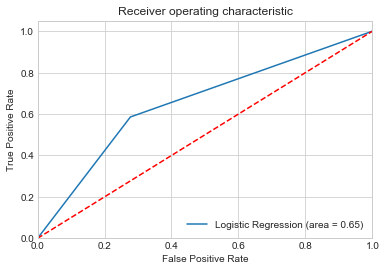

In [374]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
print (csi.max(), logit_roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [375]:
print (logisticRegr.coef_)

[[2.50162549]]


In [376]:
prob_y = logisticRegr.predict_proba(x)

In [377]:
prob_y[:, 1]

array([0.41654438, 0.48296852, 0.52093269, 0.52398565, 0.46631882,
       0.50781541, 0.61012104, 0.3918422 , 0.56578474, 0.3918422 ,
       0.82916732, 0.3918422 , 0.58991642, 0.3918422 , 0.4860927 ,
       0.5425909 , 0.3918422 , 0.4521773 , 0.3918422 , 0.5425909 ,
       0.67054027, 0.62730736, 0.3918422 , 0.76138308, 0.48763223,
       0.54693538, 0.50760187, 0.3918422 , 0.46274962, 0.63297667,
       0.41654438, 0.46631882, 0.58991642, 0.6760423 , 0.5157984 ,
       0.3918422 , 0.3918422 , 0.3918422 , 0.52592932, 0.52398565,
       0.3918422 , 0.3918422 , 0.3918422 , 0.3918422 , 0.6810454 ,
       0.41654438, 0.3918422 , 0.49945633, 0.47151124, 0.62251964,
       0.60609796, 0.42513056, 0.47987595, 0.3918422 , 0.3918422 ,
       0.44883596, 0.41654438, 0.52469255, 0.3918422 , 0.47652716,
       0.67127829, 0.4521773 , 0.43579449, 0.48915726, 0.3918422 ,
       0.3918422 , 0.46980094, 0.4521773 , 0.62614645, 0.48453827,
       0.67476352, 0.3918422 , 0.50781541, 0.41654438, 0.39184

In [378]:
threshold = np.linspace(0, 2.0, 100)
threshold_prob = logisticRegr.predict_proba(threshold.reshape(-1,1))

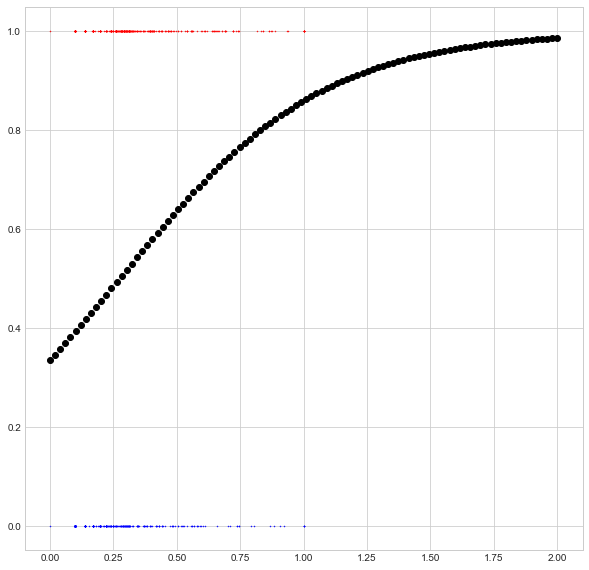

In [379]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-whitegrid')
plt.plot(threshold, threshold_prob[:,1], 'o', color='black');
plt.plot(x[y>0], y[y>0], 'o', color='red', markersize=0.5)
plt.plot(x[y==0], y[y==0], 'o', color='blue', markersize=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x17724e40390>,
 'caps': [<matplotlib.lines.Line2D at 0x17724e40b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x17724e2af28>],
 'medians': [<matplotlib.lines.Line2D at 0x17724e40f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x17724e1c5c0>],
 'means': []}

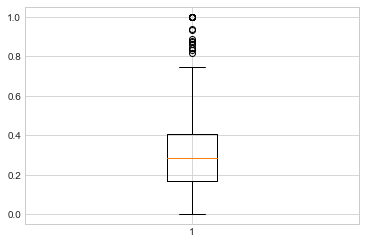

In [380]:
plt.boxplot(x[y>0])

{'whiskers': [<matplotlib.lines.Line2D at 0x17726ad9390>,
 'caps': [<matplotlib.lines.Line2D at 0x17726ad9b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x17726aecef0>],
 'medians': [<matplotlib.lines.Line2D at 0x17726ad9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17726ad05f8>],
 'means': []}

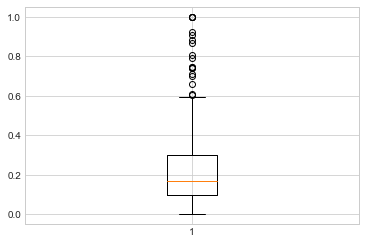

In [381]:
plt.boxplot(x[y==0])

In [382]:
print (threshold_prob[:,1])

[0.33463998 0.34598494 0.35750786 0.3691979  0.3810435  0.39303235
 0.4051515  0.41738737 0.42972581 0.44215219 0.45465143 0.46720808
 0.4798064  0.49243046 0.50506418 0.51769144 0.53029614 0.54286231
 0.55537417 0.56781621 0.58017328 0.59243063 0.60457403 0.61658977
 0.62846478 0.64018662 0.65174356 0.66312464 0.67431965 0.68531916
 0.6961146  0.70669819 0.71706299 0.72720291 0.73711267 0.74678778
 0.75622457 0.76542015 0.77437235 0.78307973 0.79154153 0.79975766
 0.80772862 0.8154555  0.82293992 0.83018402 0.83719037 0.84396198
 0.85050224 0.85681488 0.86290393 0.86877369 0.87442872 0.87987374
 0.88511368 0.89015359 0.89499863 0.89965405 0.90412519 0.90841738
 0.912536   0.91648643 0.92027403 0.92390411 0.92738194 0.93071275
 0.93390167 0.93695376 0.939874   0.94266725 0.94533828 0.94789175
 0.95033221 0.95266408 0.95489166 0.95701915 0.95905059 0.96098994
 0.962841   0.96460746 0.96629289 0.96790072 0.96943429 0.97089679
 0.97229132 0.97362084 0.97488821 0.97609619 0.97724742 0.9783

In [383]:
print (threshold[:])

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797